In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/prabowo.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           503 non-null    int64 
 1   created_at           503 non-null    object
 2   id_str               503 non-null    int64 
 3   full_text            503 non-null    object
 4   quote_count          503 non-null    int64 
 5   reply_count          503 non-null    int64 
 6   retweet_count        503 non-null    int64 
 7   favorite_count       503 non-null    int64 
 8   lang                 503 non-null    object
 9   user_id_str          503 non-null    int64 
 10  conversation_id_str  503 non-null    int64 
 11  username             503 non-null    object
 12  tweet_url            503 non-null    object
dtypes: int64(8), object(5)
memory usage: 51.2+ KB


In [ ]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


# 1. Cleaning Data

In [ ]:
df.shape

(515, 3)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
df.shape

(508, 3)

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df

,full_text,username,created_at
0,pastilah prabowo anies nggak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yg disampaikam anie...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yg kd gu...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


# 2. Preprocessing
  - Normalisasi
  - Stopword
  - Tokenize
  - Stemming

In [ ]:
# Normalisasi

norm = {" yg ": " yang ", " ganjar ":" ", " prabowo ": " ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,pastilah anies tidak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikam an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yang kd ...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,pastilah anies punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


In [ ]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0                     [pastilah, anies, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid1/real_yt/hasilPreprocessing/hasilPreprocessingAnies.csv", index=False)

# 3. Translate

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid1/real_yt/hasilPreprocessing/hasilPreprocessingAnies.csv", encoding='latin1')
data.head()

,full_text
0,pasti prabowo anies punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...


In [ ]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid1/real_yt/hasilTerjemahan/terjemahanAnies.csv")

# 4. Labeling

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid1/real_yt/hasilTerjemahan/TerjemahanAnies.csv", index_col=0)
data

,full_text,tweet_english
0,pasti anies punya prestasi,surely prabowo anies has achievements
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr...."
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 138
Netral = 83
Negatif = 57

Total Data : 278


In [ ]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
...,...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...,Netral
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...,Netral
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr....",Positif
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...,Negatif


# 5. Visualisasi

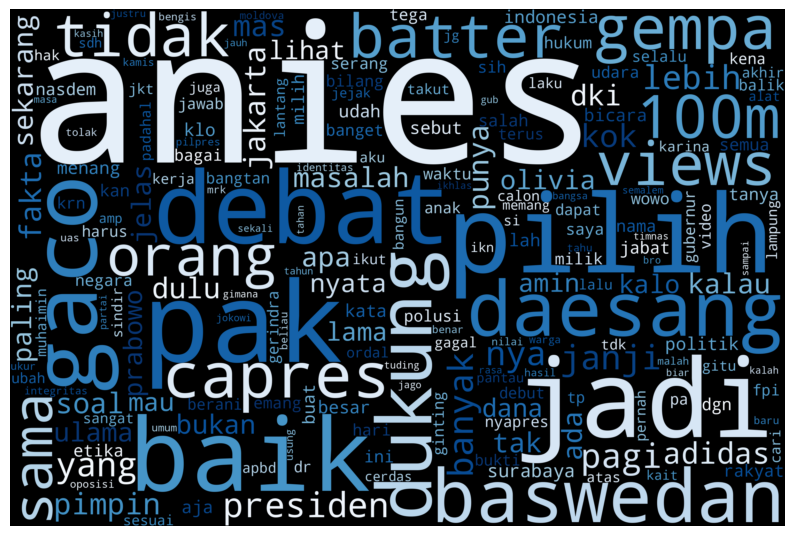

In [ ]:
from wordcloud import WordCloud, STOPWORDS


def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

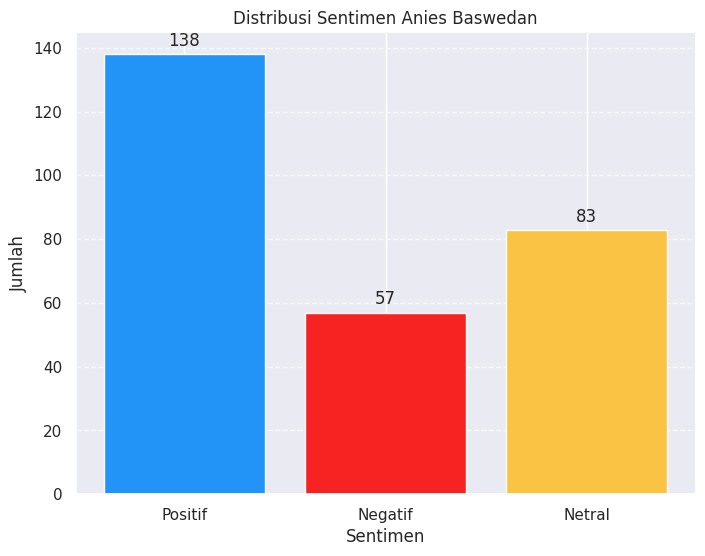

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")

# 6. Klasifikasi Sentimen

In [ ]:
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
...,...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...,Netral
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...,Netral
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr....",Positif
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...,Negatif


In [ ]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7446043165467626


In [ ]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 188
Netral = 68
Negatif = 22

Total Data : 278


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

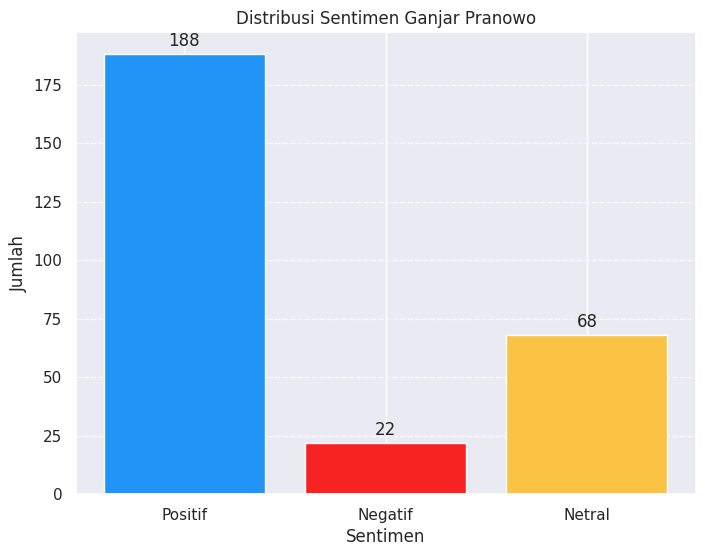

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")

In [ ]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
...,...,...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...,Netral,Netral
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...,Netral,Netral
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr....",Positif,Positif
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...,Negatif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: prabowo kait apbd dki puluh trilyun dgn mampu anies atas polusi padahal masalah polusi jkt bukan soal uang tentang wenang perintah pusat stupid soal lingkung yang harus koreksi
Classifier: Negatif
Classifier Bayes: Netral 

Text: anies lbh baik banding kamu hya dewan jilat amp munafik
Classifier: Netral
Classifier Bayes: Positif 

Text: hukum tegak semua capres anies singgung gibran papar visi misi soal tega hukum
Classifier: Netral
Classifier Bayes: Positif 

Text: lamongan viva jatim naskah uji kelas xi smk muhammadiyah sekar kabupaten lamongan pampang foto calon presiden capres anis baswedan naskah uji mata ajar bahasa inggris dapat foto anies baswedan sebut dapat poin b nomer 21 23
Classifier: Netral
Classifier Bayes: Positif 

Text: ini 13 poin pakta integritas pakat paslon 1 anies baswedan muhaimin iskandar dapat dukung ijtima ulama sepenuh
Classifier: Positif
Classifier Bayes: Netral 

Text: yang bilang anies modal kata doang pacar eco park tebet musuhin aja
Classifier: Ne